## Task 1 — Deep Prediction Analysis


In [29]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [68]:
import matplotlib.pyplot as plt

def plot_history_and_save(history, name, folder):
    # Loss
    plt.figure(figsize=(6,4))
    plt.plot(history.history["loss"], label="train_loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.title(f"{name} - Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{folder}/{name}_loss.png", dpi=200)
    plt.show()
    plt.close()

    # Accuracy
    plt.figure(figsize=(6,4))
    plt.plot(history.history["accuracy"], label="train_acc")
    plt.plot(history.history["val_accuracy"], label="val_acc")
    plt.title(f"{name} - Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{folder}/{name}_acc.png", dpi=200)
    plt.show()
    plt.close()


In [30]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [31]:
x_train , x_test = x_train / 255.0 , x_test / 255.0

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])


In [33]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [34]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8739 - loss: 0.4417 - val_accuracy: 0.9587 - val_loss: 0.1396
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9636 - loss: 0.1237 - val_accuracy: 0.9653 - val_loss: 0.1117
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9751 - loss: 0.0799 - val_accuracy: 0.9741 - val_loss: 0.0860
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9833 - loss: 0.0560 - val_accuracy: 0.9705 - val_loss: 0.0952
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9872 - loss: 0.0421 - val_accuracy: 0.9753 - val_loss: 0.0799


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Sample index: 17
Predicted label: 7
True label: 7
Confidence score: 0.9995
----------------------------------------


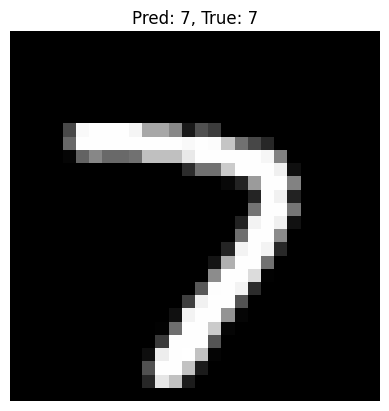

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Sample index: 30
Predicted label: 3
True label: 3
Confidence score: 0.9999
----------------------------------------


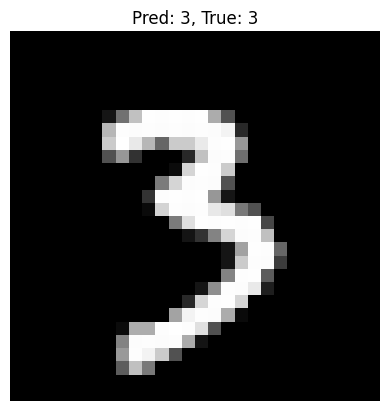

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Sample index: 80
Predicted label: 7
True label: 7
Confidence score: 0.9998
----------------------------------------


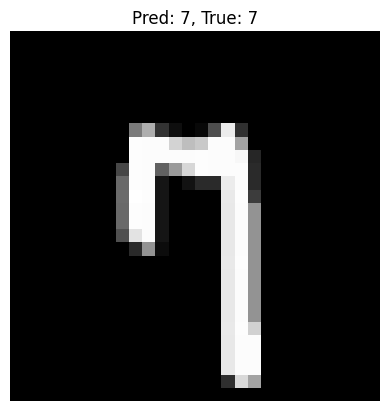

In [36]:
samples = [17, 30, 80]

for i in samples:
    sample = x_test[i].reshape(1, 28, 28)
    pred = model.predict(sample)

    predicted_label = np.argmax(pred)
    true_label = y_test[i]
    confidence = np.max(pred)

    print(f"Sample index: {i}")
    print(f"Predicted label: {predicted_label}")
    print(f"True label: {true_label}")
    print(f"Confidence score: {confidence:.4f}")
    print("-" * 40)

    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {predicted_label}, True: {true_label}")
    plt.axis('off')
    plt.show()


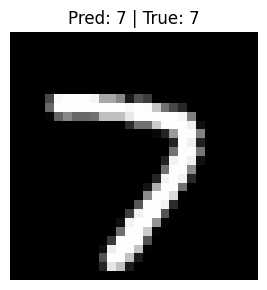

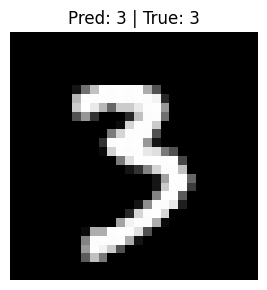

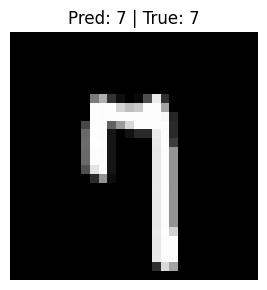

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Select 3 test samples
samples = [17, 30, 80]

for idx, i in enumerate(samples, start=1):
    sample = x_test[i].reshape(1, 28, 28)
    pred = model.predict(sample, verbose=0)

    predicted_label = int(np.argmax(pred))
    true_label = int(y_test[i])

    plt.figure(figsize=(3,3))
    plt.imshow(x_test[i], cmap="gray")
    plt.title(f"Pred: {predicted_label} | True: {true_label}")
    plt.axis("off")
    plt.tight_layout()

    plt.savefig(
        f"results/predictions/Task01_sample{idx}_pred{predicted_label}_true{true_label}.png",
        dpi=200
    )

    plt.show()
    plt.close()


### Analysis

The model predicted most of the selected test images correctly.
Each image is flattened into a long vector before entering the network.
The Dense layer with ReLU activation helps the model learn useful patterns.
Softmax converts the output into probabilities for each digit.
The class with the highest probability is chosen as the prediction.
Adam optimizer helps the model learn faster and more stable.
Wrong predictions usually happen when digits look similar.


## Task 02 — Custom Image Generalization


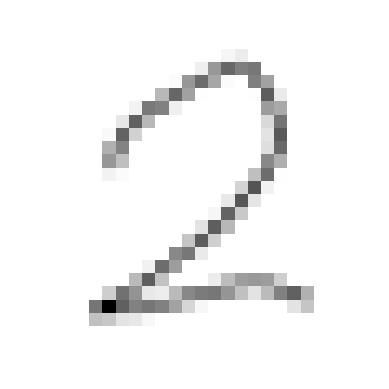

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted label: 3
Probabilities: [4.7616598e-12 8.9498103e-17 1.5293903e-03 9.9631244e-01 8.0268972e-34
 9.1140915e-04 2.1751804e-14 1.2467635e-03 5.3656098e-15 9.6655594e-21]


In [37]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

# load custom image
img = Image.open("/content/Screenshot 2025-12-17 134154.png")
img = img.convert("L")
img = ImageOps.invert(img)
img = img.resize((28, 28))

img_arr = np.array(img) / 255.0
img_arr = img_arr.reshape(1, 28, 28)

plt.imshow(img_arr[0], cmap="gray")
plt.axis("off")
plt.show()

pred = model.predict(img_arr)
print("Predicted label:", np.argmax(pred))
print("Probabilities:", pred[0])


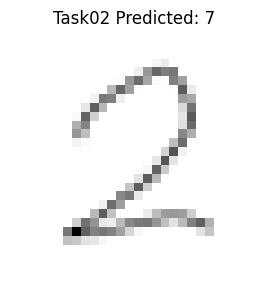

In [81]:
plt.figure(figsize=(3,3))
plt.imshow(img_arr[0], cmap="gray")
plt.title(f"Task02 Predicted: {int(np.argmax(pred))}")
plt.axis("off")
plt.tight_layout()

plt.savefig(
    "results/predictions/Task02_custom_digit.png",
    dpi=200
)

plt.show()
plt.close()


### Analysis

The model tried to predict a handwritten digit drawn by the user.
If the prediction is correct, it means the model learned general digit patterns.
If the prediction is wrong, it may be because the image is different from training data.
Noise, drawing style, or line thickness can affect the result.
This shows how neural networks depend on data distribution.


## Task 03 — Epoch-Based Learning Curve Exploration


In [39]:
def train_model(epochs):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    history = model.fit(
        x_train, y_train,
        epochs=epochs,
        validation_data=(x_test, y_test),
        verbose=1
    )

    return history


In [40]:
history_5 = train_model(5)
history_10 = train_model(10)
history_20 = train_model(20)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8827 - loss: 0.4208 - val_accuracy: 0.9600 - val_loss: 0.1400
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9658 - loss: 0.1180 - val_accuracy: 0.9685 - val_loss: 0.1038
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9767 - loss: 0.0790 - val_accuracy: 0.9736 - val_loss: 0.0862
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9818 - loss: 0.0581 - val_accuracy: 0.9769 - val_loss: 0.0726
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9864 - loss: 0.0440 - val_accuracy: 0.9773 - val_loss: 0.0692
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8762 - loss: 0.4319 - val_accuracy: 0.9604 - val_loss: 0.1377
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9650 - loss: 0.1198 - val_accuracy: 0.9683 - val_loss: 0.1111
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9760 - loss: 0.0794 - v

In [41]:
def plot_history(history, title):
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.plot(history.history["loss"], label="train_loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.title(title + " - Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history["accuracy"], label="train_accuracy")
    plt.plot(history.history["val_accuracy"], label="val_accuracy")
    plt.title(title + " - Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.show()


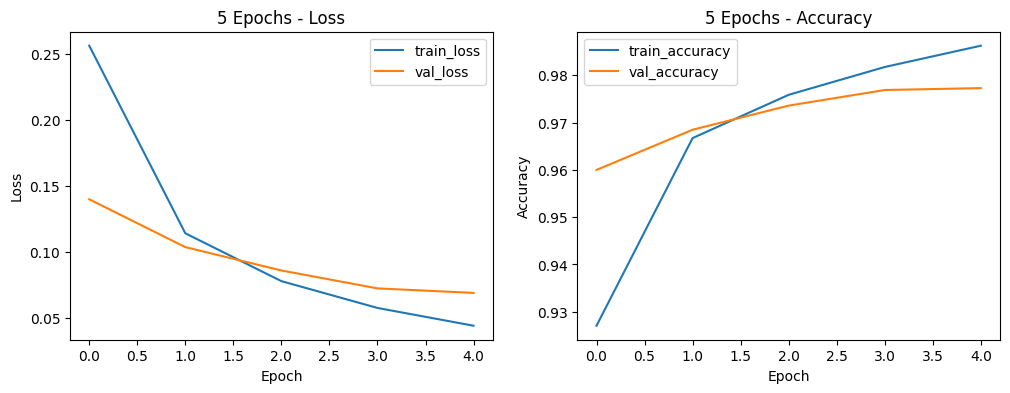

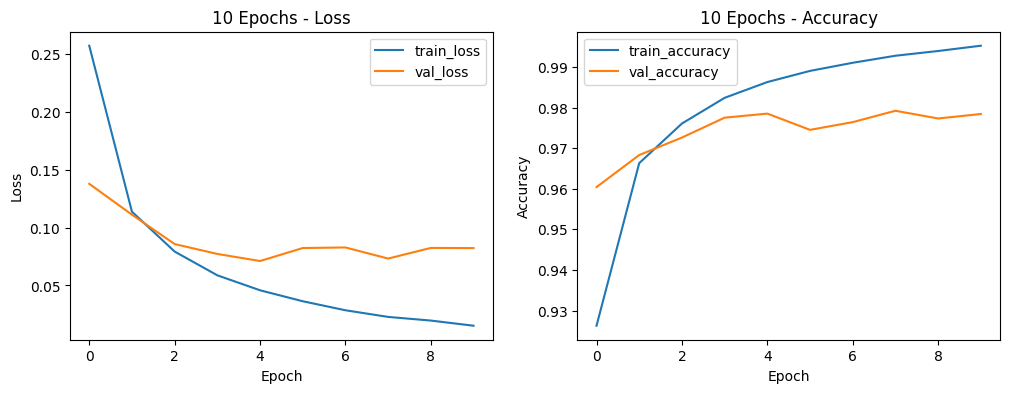

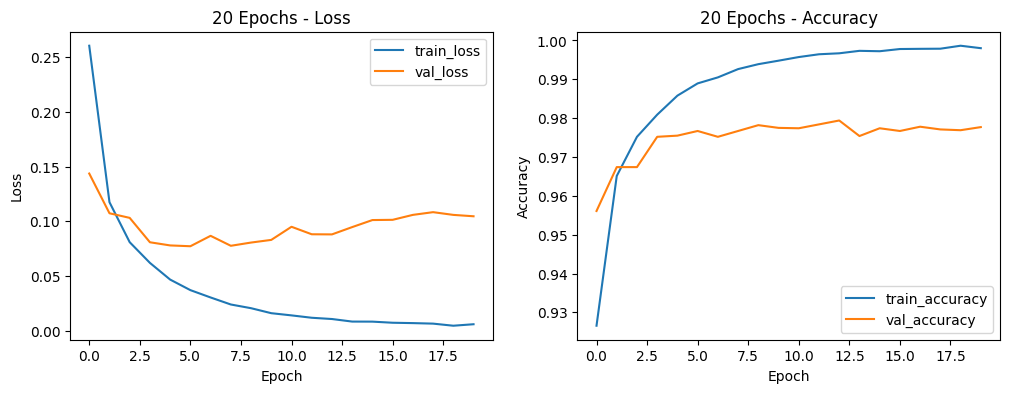

In [42]:
plot_history(history_5, "5 Epochs")
plot_history(history_10, "10 Epochs")
plot_history(history_20, "20 Epochs")



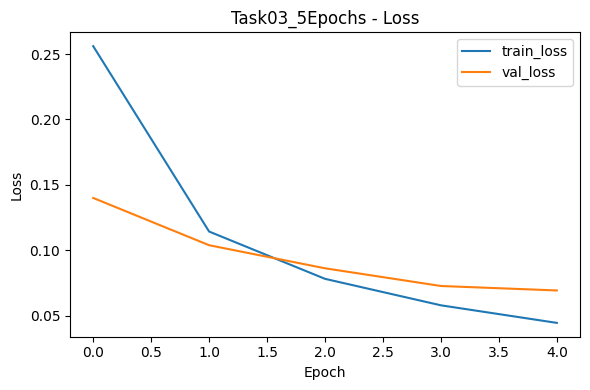

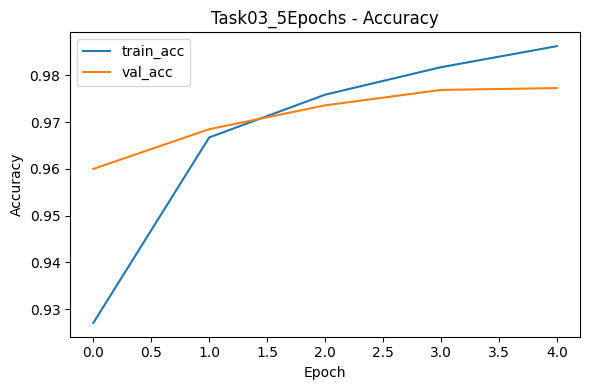

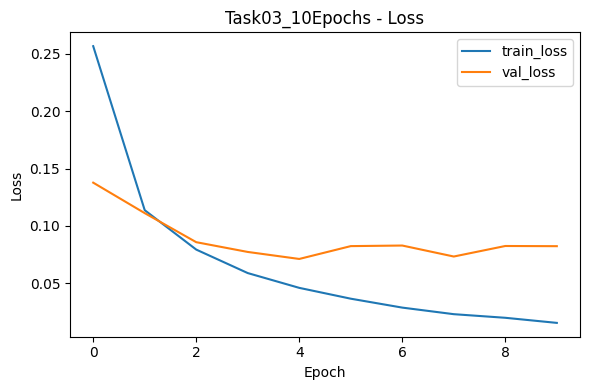

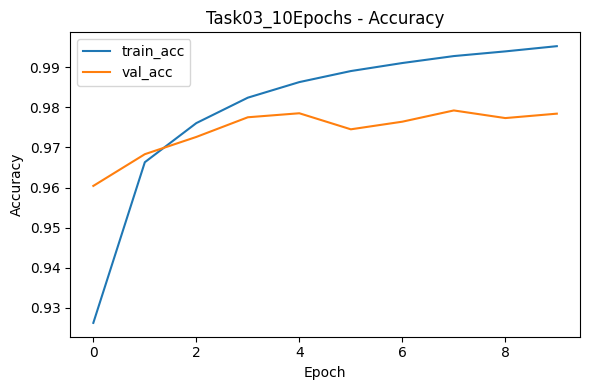

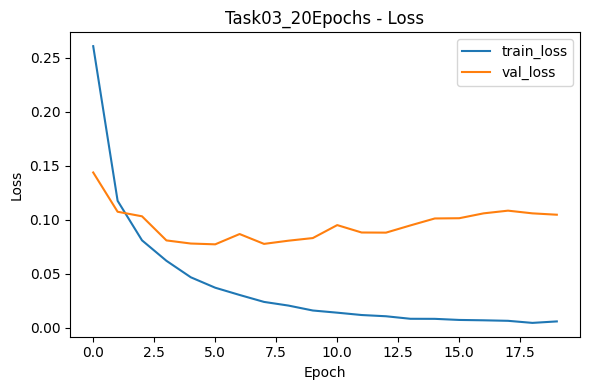

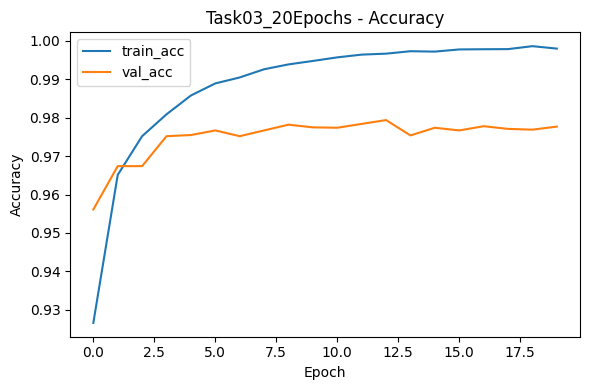

In [72]:
plot_history_and_save(history_5,  "Task03_5Epochs",  "results/loss_curves")
plot_history_and_save(history_10, "Task03_10Epochs", "results/loss_curves")
plot_history_and_save(history_20, "Task03_20Epochs", "results/loss_curves")


### Analysis

With 5 epochs, the model is still learning and accuracy is low.
With 10 epochs, performance improves and validation accuracy increases.
With 20 epochs, training accuracy increases more than validation accuracy.
This shows signs of overfitting.
Adam optimizer helps the model converge faster and more smoothly.


## Task 04 — EarlyStopping Behavior Analysis


In [43]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

model_es = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_es.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_es = model_es.fit(
    x_train, y_train,
    epochs=50,
    validation_data=(x_test, y_test),
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8785 - loss: 0.4329 - val_accuracy: 0.9608 - val_loss: 0.1338
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9650 - loss: 0.1208 - val_accuracy: 0.9685 - val_loss: 0.1047
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9765 - loss: 0.0767 - val_accuracy: 0.9723 - val_loss: 0.0895
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9822 - loss: 0.0564 - val_accuracy: 0.9761 - val_loss: 0.0836
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9867 - loss: 0.0426 - val_accuracy: 0.9776 - val_loss: 0.0734
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9897 - loss: 0.0337 - val_accuracy: 0.9783 - val_loss: 0.0728
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9919 - loss: 0.0270 - val_accuracy: 0.9788 - val_loss: 0.0737
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9940 - loss: 0.0206 

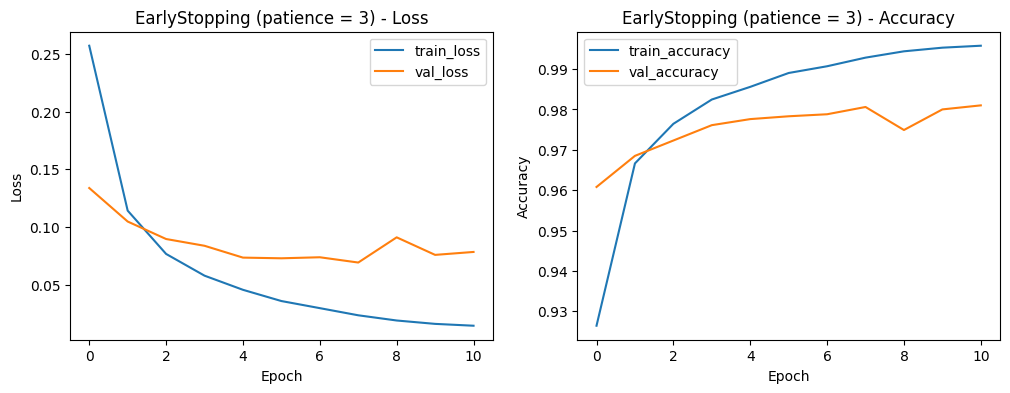

In [44]:
plot_history(history_es, "EarlyStopping (patience = 3)")


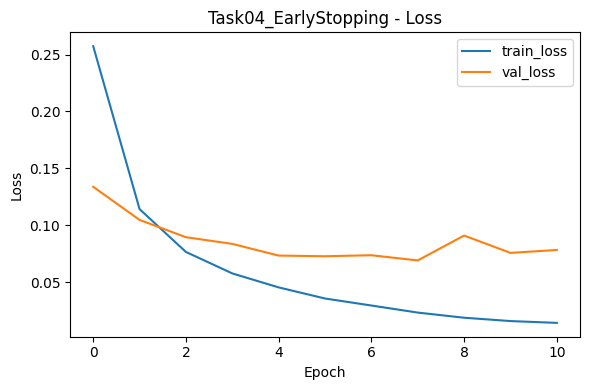

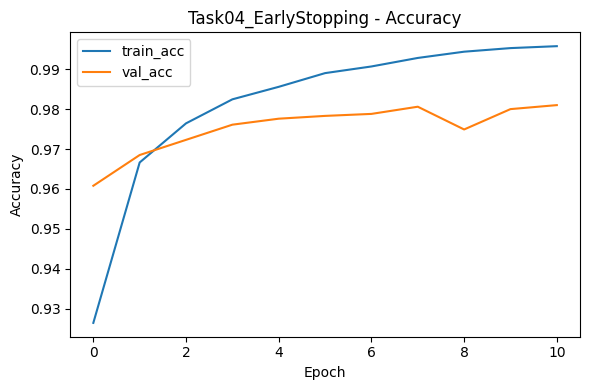

In [73]:
plot_history_and_save(history_es, "Task04_EarlyStopping", "results/loss_curves")


### Analysis

Training stopped early before reaching the maximum number of epochs.
EarlyStopping monitors validation loss, not training loss.
When validation loss stops improving, training is stopped to avoid overfitting.
This helps the model generalize better.
EarlyStopping works as a simple form of regularization.


## Task 05 — Dropout Ablation Study


In [51]:
def build_model(dropout_rate=None):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation="relu"),
    ])

    if dropout_rate is not None:
        model.add(keras.layers.Dropout(dropout_rate))

    model.add(keras.layers.Dense(10, activation="softmax"))

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model


In [46]:
model_no_dropout = build_model()
history_no = model_no_dropout.fit(
    x_train, y_train,
    epochs=20,
    validation_data=(x_test, y_test),
    verbose=1
)

model_do_01 = build_model(0.1)
history_01 = model_do_01.fit(
    x_train, y_train,
    epochs=20,
    validation_data=(x_test, y_test),
    verbose=1
)

model_do_03 = build_model(0.3)
history_03 = model_do_03.fit(
    x_train, y_train,
    epochs=20,
    validation_data=(x_test, y_test),
    verbose=1
)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8735 - loss: 0.4474 - val_accuracy: 0.9593 - val_loss: 0.1373
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9633 - loss: 0.1239 - val_accuracy: 0.9698 - val_loss: 0.1009
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9760 - loss: 0.0799 - val_accuracy: 0.9746 - val_loss: 0.0821
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9847 - loss: 0.0546 - val_accuracy: 0.9768 - val_loss: 0.0792
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9878 - loss: 0.0396 - val_accuracy: 0.9728 - val_loss: 0.0879
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9898 - loss: 0.0332 - val_accuracy: 0.9777 - val_loss: 0.0751
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9924 - loss: 0.0254 - val_accuracy: 0.9763 - val_loss: 0.0799
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9945 - loss: 0.018

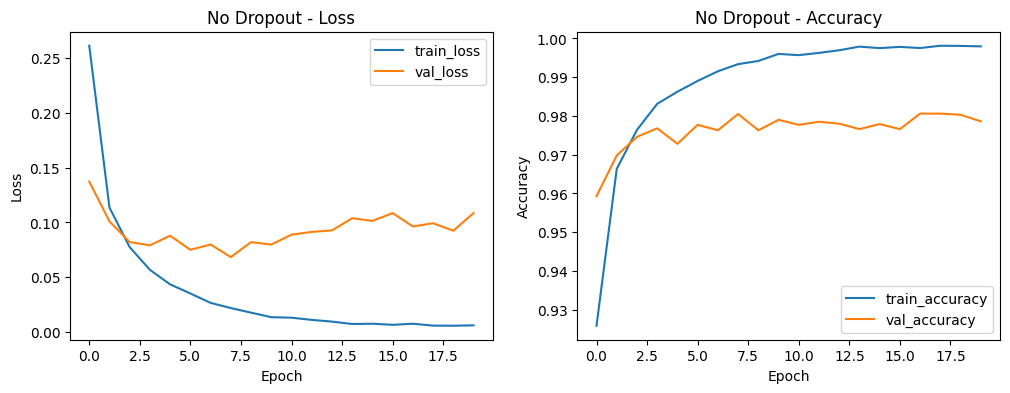

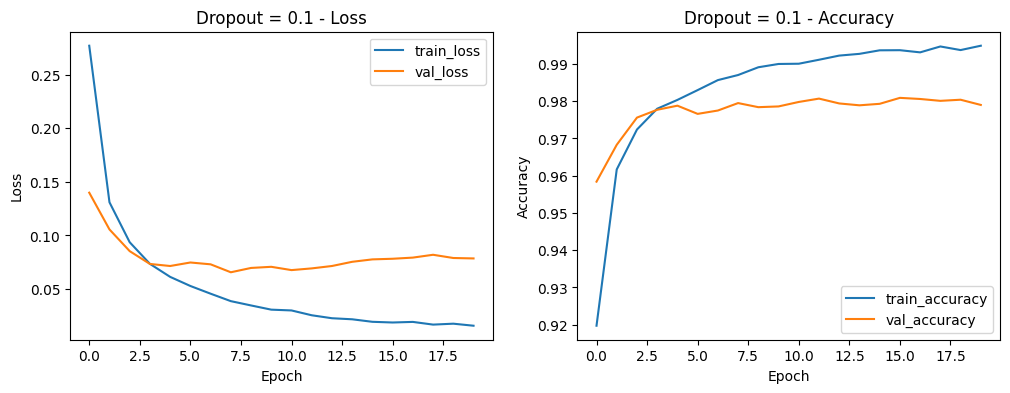

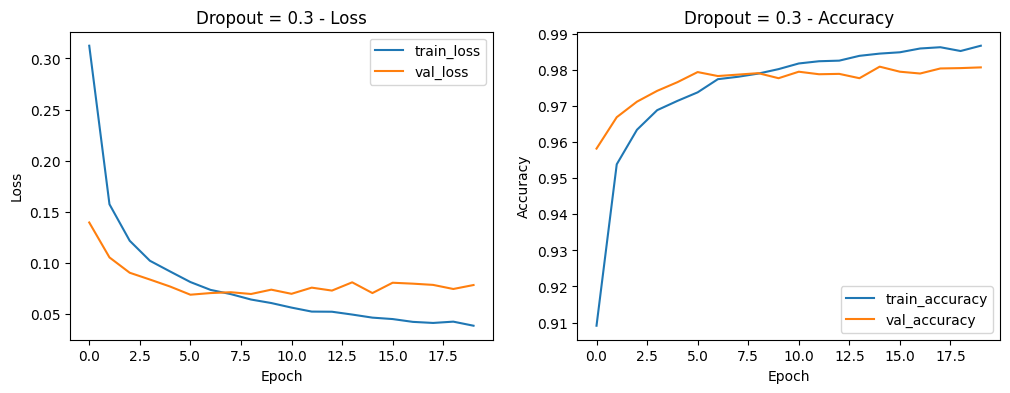

In [47]:
plot_history(history_no, "No Dropout")
plot_history(history_01, "Dropout = 0.1")
plot_history(history_03, "Dropout = 0.3")


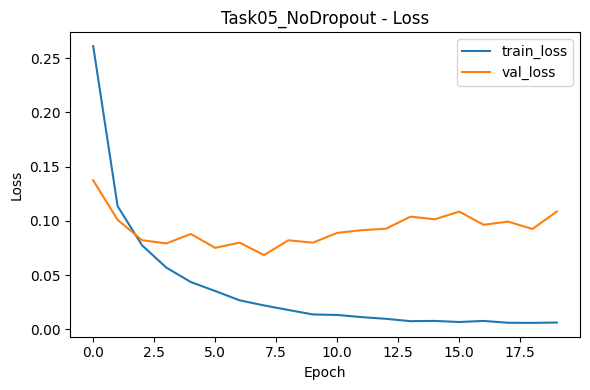

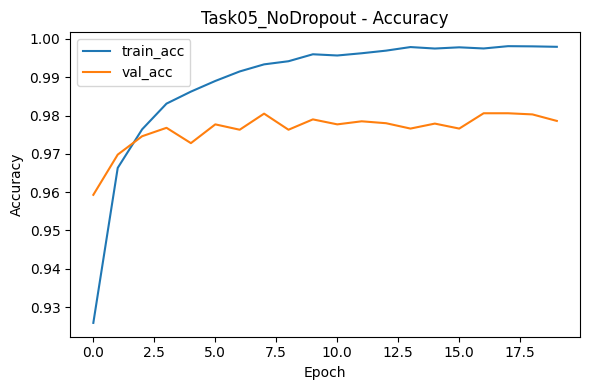

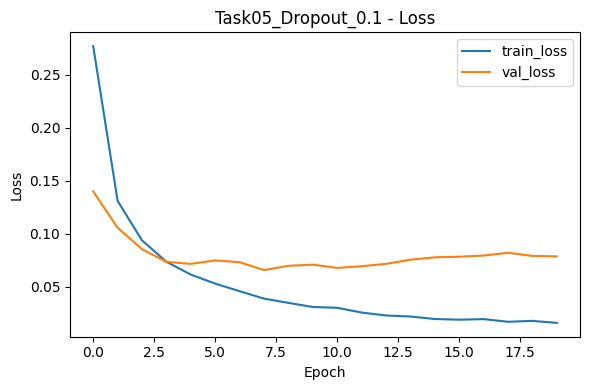

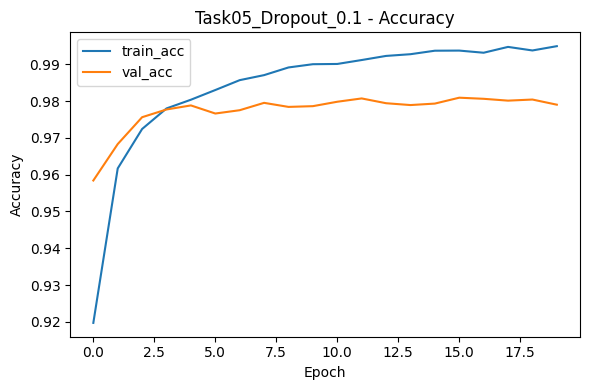

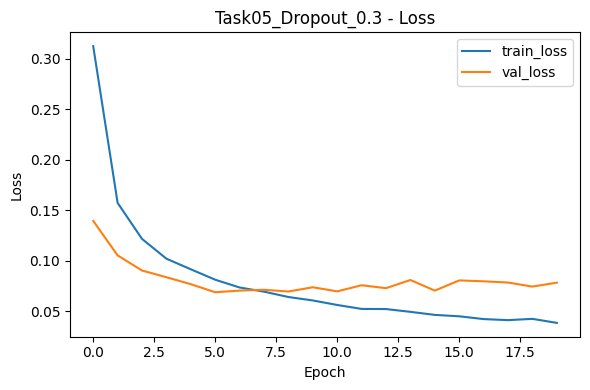

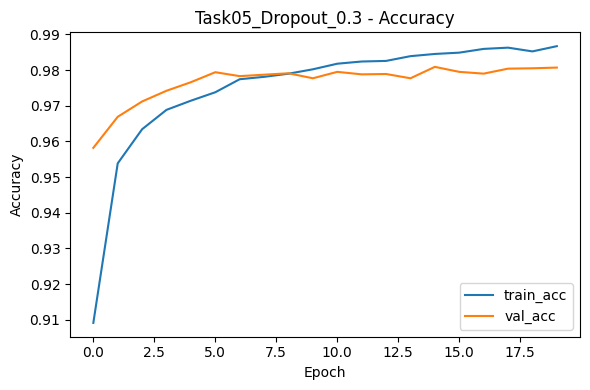

In [74]:
plot_history_and_save(history_no, "Task05_NoDropout", "results/loss_curves")
plot_history_and_save(history_01, "Task05_Dropout_0.1", "results/loss_curves")
plot_history_and_save(history_03, "Task05_Dropout_0.3", "results/loss_curves")


### Analysis

Without dropout, the model learns fast but may overfit.
With dropout 0.1, the model generalizes better.
With dropout 0.3, training becomes slower and accuracy may drop.
Dropout prevents neurons from depending too much on each other.
This helps reduce overfitting.


## Task 06 — L2 Regularization Experiment


In [48]:
from tensorflow.keras import regularizers

def build_model_l2(l2_value):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(
            128,
            activation="relu",
            kernel_regularizer=regularizers.l2(l2_value)
        ),
        keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model


In [49]:
model_l2_0001 = build_model_l2(0.0001)
history_l2_0001 = model_l2_0001.fit(
    x_train, y_train,
    epochs=20,
    validation_data=(x_test, y_test),
    verbose=1
)

model_l2_001 = build_model_l2(0.001)
history_l2_001 = model_l2_001.fit(
    x_train, y_train,
    epochs=20,
    validation_data=(x_test, y_test),
    verbose=1
)

model_l2_01 = build_model_l2(0.01)
history_l2_01 = model_l2_01.fit(
    x_train, y_train,
    epochs=20,
    validation_data=(x_test, y_test),
    verbose=1
)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8726 - loss: 0.4648 - val_accuracy: 0.9550 - val_loss: 0.1800
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9632 - loss: 0.1542 - val_accuracy: 0.9674 - val_loss: 0.1375
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9730 - loss: 0.1209 - val_accuracy: 0.9693 - val_loss: 0.1328
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9797 - loss: 0.1028 - val_accuracy: 0.9774 - val_loss: 0.1059
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9834 - loss: 0.0919 - val_accuracy: 0.9760 - val_loss: 0.1112
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9846 - loss: 0.0877 - val_accuracy: 0.9749 - val_loss: 0.1167
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9862 - loss: 0.0835 - val_accuracy: 0.9749 - val_loss: 0.1147
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9875 - loss: 0.07

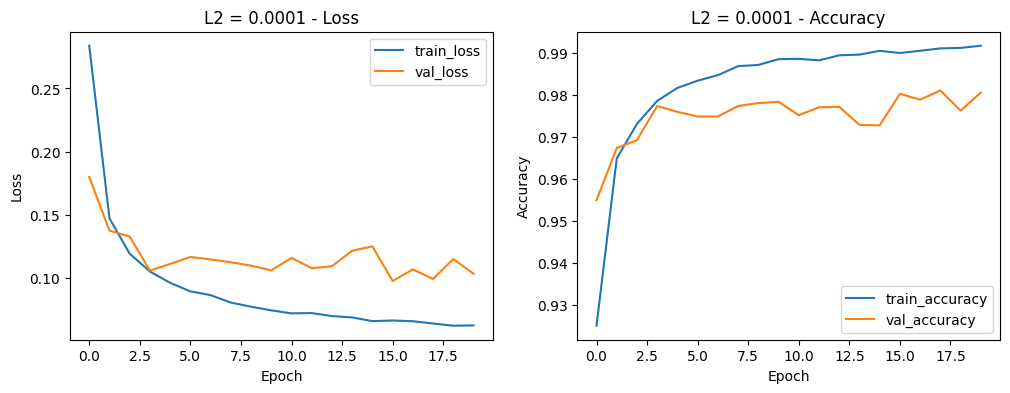

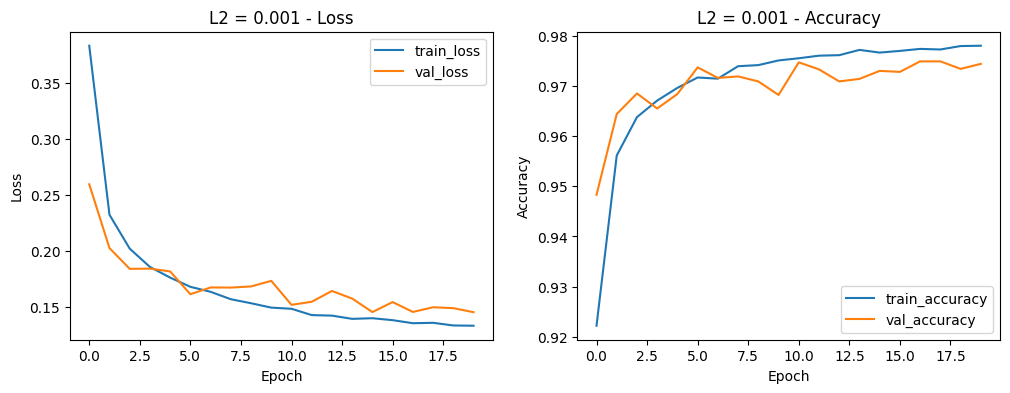

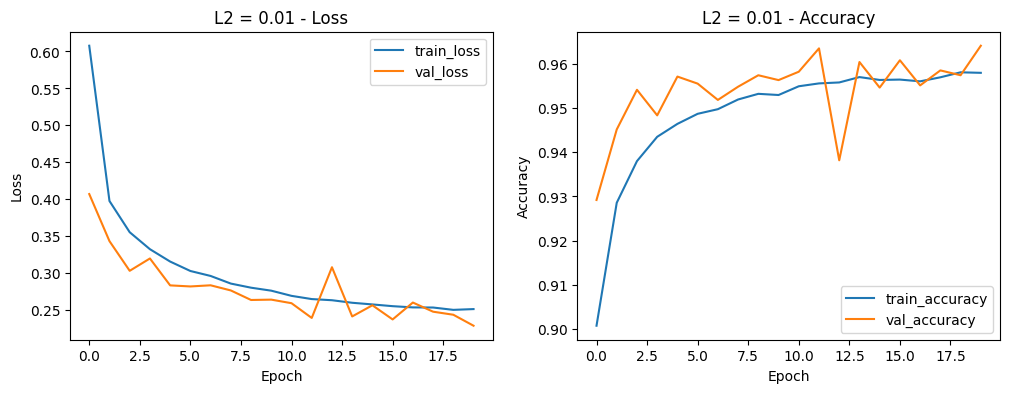

In [50]:
plot_history(history_l2_0001, "L2 = 0.0001")
plot_history(history_l2_001, "L2 = 0.001")
plot_history(history_l2_01, "L2 = 0.01")


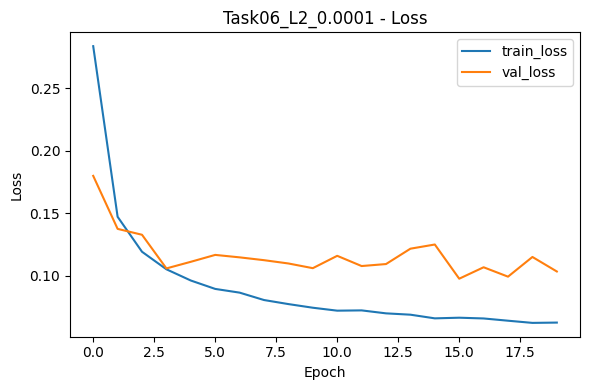

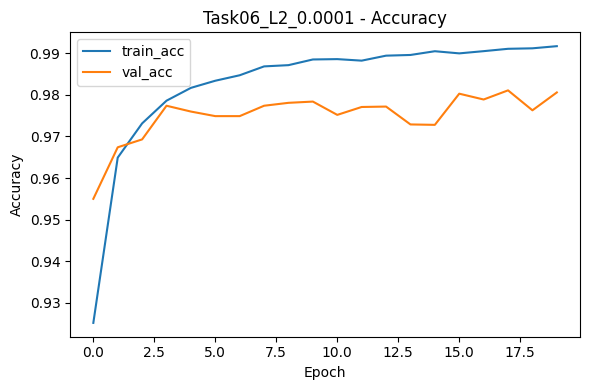

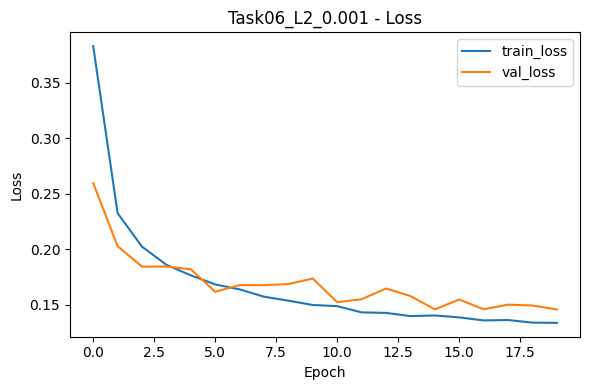

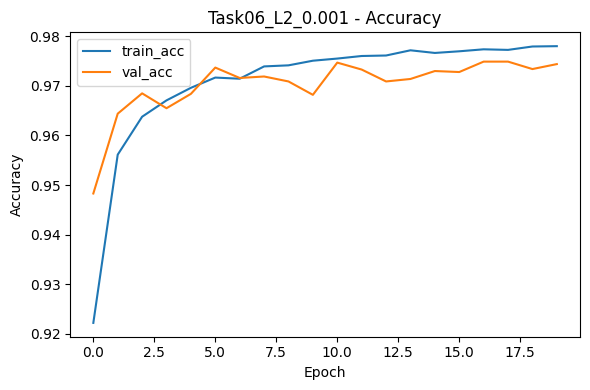

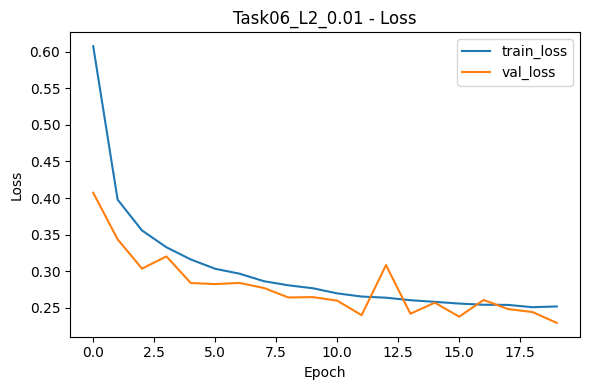

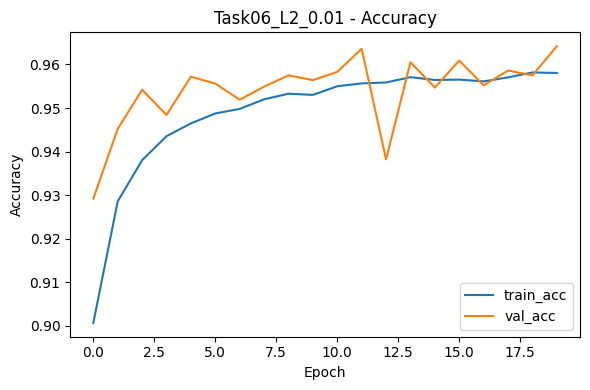

In [75]:
plot_history_and_save(history_l2_0001, "Task06_L2_0.0001", "results/loss_curves")
plot_history_and_save(history_l2_001,  "Task06_L2_0.001",  "results/loss_curves")
plot_history_and_save(history_l2_01,   "Task06_L2_0.01",   "results/loss_curves")


### Analysis

L2 regularization reduces the size of the weights.
Small L2 values improve generalization.
Large L2 values make learning harder and reduce accuracy.
L2 helps prevent overfitting by penalizing large weights.


## Task 07 — Optimizer Comparison Challenge


In [52]:
def build_base_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ])
    return model


In [53]:
model_sgd = build_base_model()
model_sgd.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_sgd = model_sgd.fit(
    x_train, y_train,
    epochs=20,
    validation_data=(x_test, y_test),
    verbose=1
)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7295 - loss: 1.0416 - val_accuracy: 0.9032 - val_loss: 0.3579
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9004 - loss: 0.3583 - val_accuracy: 0.9158 - val_loss: 0.2984
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9161 - loss: 0.3033 - val_accuracy: 0.9248 - val_loss: 0.2691
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9248 - loss: 0.2719 - val_accuracy: 0.9319 - val_loss: 0.2457
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9302 - loss: 0.2495 - val_accuracy: 0.9374 - val_loss: 0.2271
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9354 - loss: 0.2301 - val_accuracy: 0.9404 - val_loss: 0.2120
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9423 - loss: 0.2087 - val_accuracy: 0.9440 - val_loss: 0.2006
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9453 - loss: 0.1959 -

In [54]:
model_sgd_m = build_base_model()
model_sgd_m.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_sgd_m = model_sgd_m.fit(
    x_train, y_train,
    epochs=20,
    validation_data=(x_test, y_test),
    verbose=1
)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8550 - loss: 0.4946 - val_accuracy: 0.9500 - val_loss: 0.1713
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9530 - loss: 0.1617 - val_accuracy: 0.9654 - val_loss: 0.1182
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9686 - loss: 0.1139 - val_accuracy: 0.9716 - val_loss: 0.0992
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9755 - loss: 0.0841 - val_accuracy: 0.9716 - val_loss: 0.0912
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9800 - loss: 0.0697 - val_accuracy: 0.9734 - val_loss: 0.0872
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9837 - loss: 0.0584 - val_accuracy: 0.9739 - val_loss: 0.0833
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9861 - loss: 0.0481 - val_accuracy: 0.9769 - val_loss: 0.0716
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9882 - loss: 0.0410 -

In [55]:
model_adam = build_base_model()
model_adam.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_adam = model_adam.fit(
    x_train, y_train,
    epochs=20,
    validation_data=(x_test, y_test),
    verbose=1
)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8797 - loss: 0.4254 - val_accuracy: 0.9596 - val_loss: 0.1463
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9631 - loss: 0.1229 - val_accuracy: 0.9688 - val_loss: 0.1047
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9774 - loss: 0.0778 - val_accuracy: 0.9737 - val_loss: 0.0865
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9820 - loss: 0.0594 - val_accuracy: 0.9750 - val_loss: 0.0800
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9867 - loss: 0.0438 - val_accuracy: 0.9739 - val_loss: 0.0839
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9900 - loss: 0.0325 - val_accuracy: 0.9779 - val_loss: 0.0706
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9919 - loss: 0.0266 - val_accuracy: 0.9777 - val_loss: 0.0780
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9942 - loss: 0.0198 - 

In [56]:
model_adamw = build_base_model()
model_adamw.compile(
    optimizer=keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_adamw = model_adamw.fit(
    x_train, y_train,
    epochs=20,
    validation_data=(x_test, y_test),
    verbose=1
)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8802 - loss: 0.4263 - val_accuracy: 0.9611 - val_loss: 0.1319
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9637 - loss: 0.1221 - val_accuracy: 0.9694 - val_loss: 0.1021
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9776 - loss: 0.0759 - val_accuracy: 0.9722 - val_loss: 0.0860
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9831 - loss: 0.0555 - val_accuracy: 0.9754 - val_loss: 0.0793
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9869 - loss: 0.0411 - val_accuracy: 0.9776 - val_loss: 0.0765
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9897 - loss: 0.0318 - val_accuracy: 0.9774 - val_loss: 0.0733
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9923 - loss: 0.0256 - val_accuracy: 0.9799 - val_loss: 0.0708
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9945 - loss: 0.01

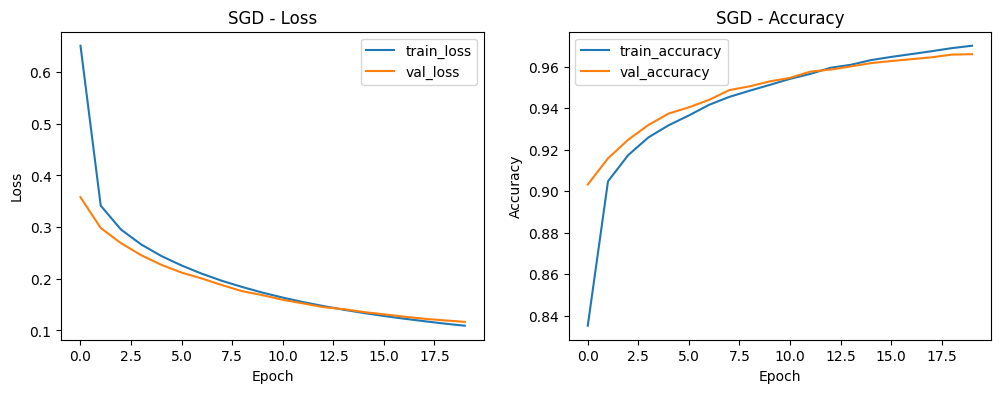

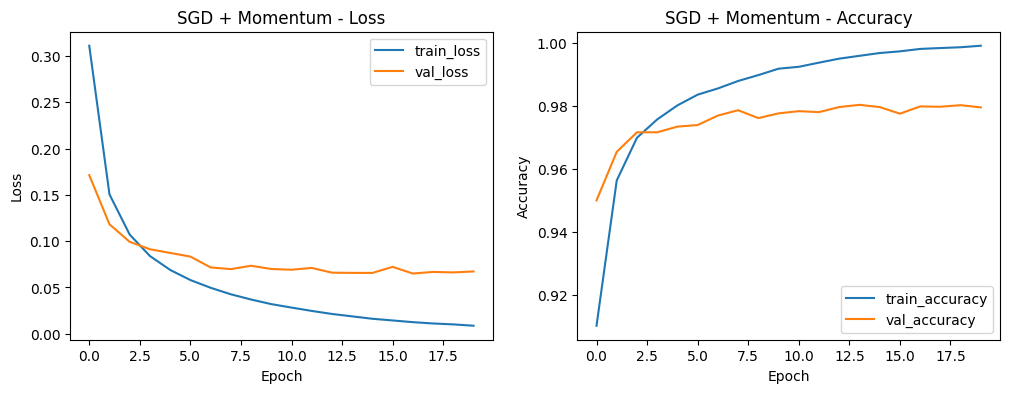

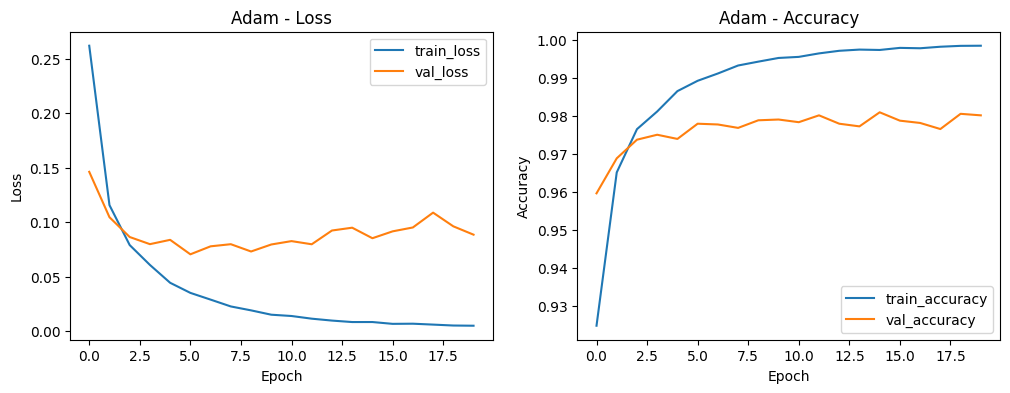

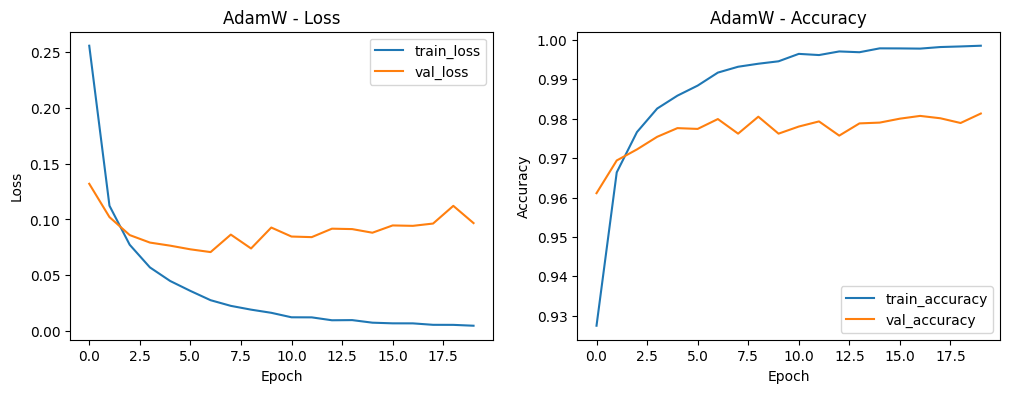

In [57]:
plot_history(history_sgd, "SGD")
plot_history(history_sgd_m, "SGD + Momentum")
plot_history(history_adam, "Adam")
plot_history(history_adamw, "AdamW")


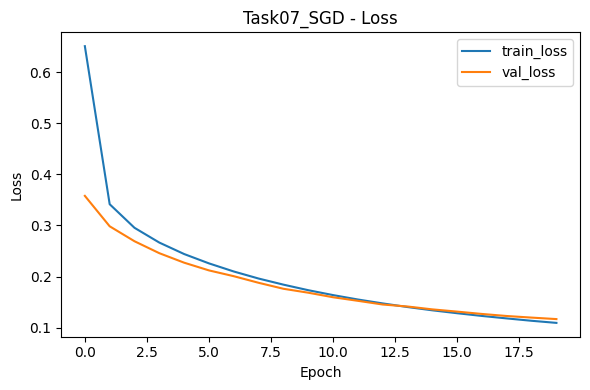

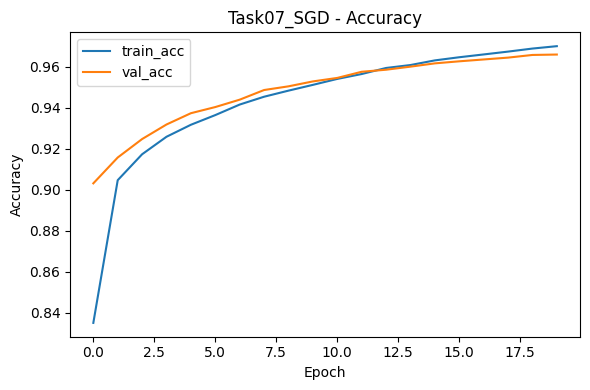

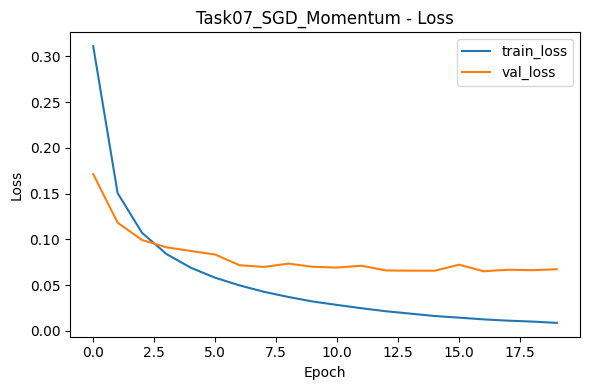

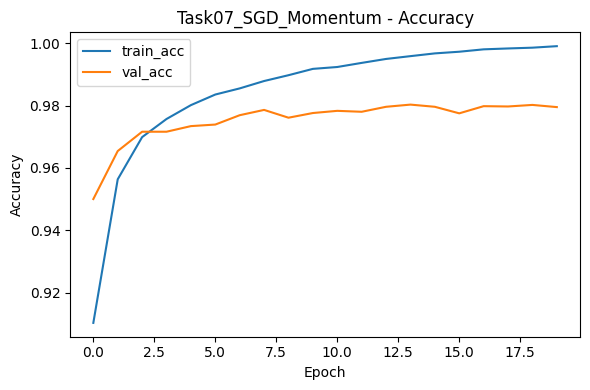

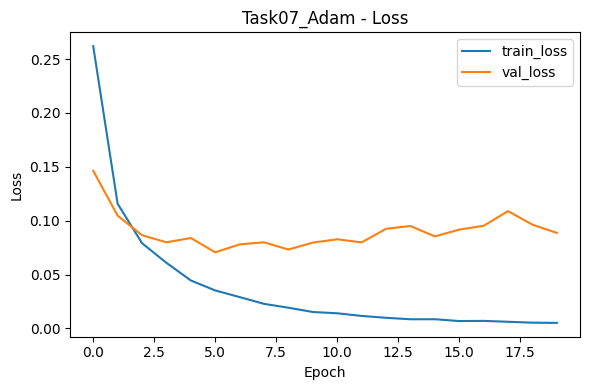

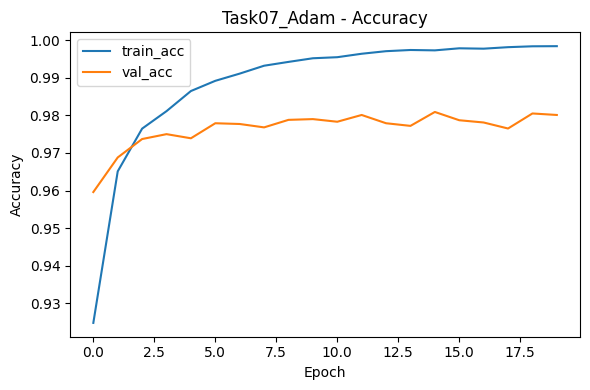

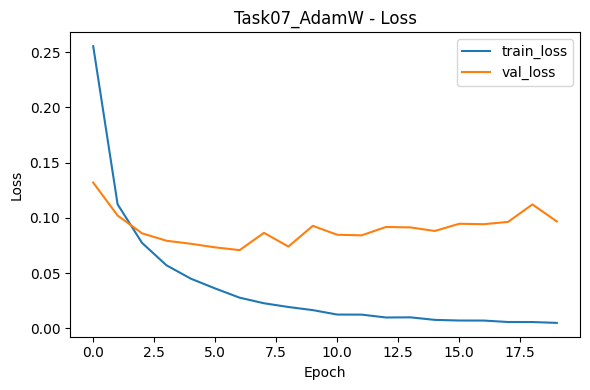

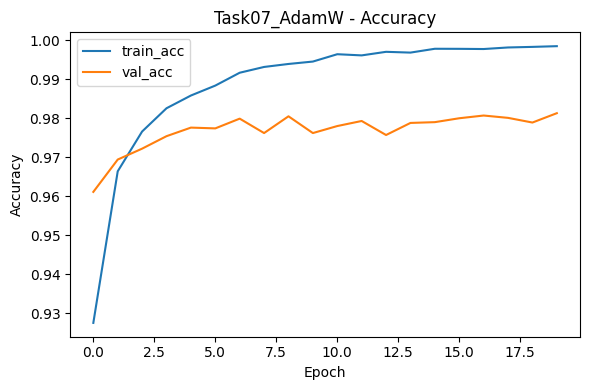

In [76]:
plot_history_and_save(history_sgd,   "Task07_SGD", "results/optimizer_tests")
plot_history_and_save(history_sgd_m, "Task07_SGD_Momentum", "results/optimizer_tests")
plot_history_and_save(history_adam,  "Task07_Adam", "results/optimizer_tests")
plot_history_and_save(history_adamw, "Task07_AdamW", "results/optimizer_tests")


### Analysis

SGD learns slowly and needs more epochs.
SGD with momentum converges faster and is more stable.
Adam converges quickly with smooth loss curves.
AdamW improves generalization by adding weight decay.
Different optimizers move differently in the loss landscape.


## Task 08 — Batch Size & Gradient Noise Experiment


In [58]:
def train_with_batch_size(batch_size):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    history = model.fit(
        x_train, y_train,
        epochs=20,
        batch_size=batch_size,
        validation_data=(x_test, y_test),
        verbose=1
    )
    return history


In [59]:
history_bs_8 = train_with_batch_size(8)
history_bs_32 = train_with_batch_size(32)
history_bs_128 = train_with_batch_size(128)


Epoch 1/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 0.8979 - loss: 0.3424 - val_accuracy: 0.9676 - val_loss: 0.1063
Epoch 2/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9712 - loss: 0.0964 - val_accuracy: 0.9703 - val_loss: 0.0982
Epoch 3/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9793 - loss: 0.0653 - val_accuracy: 0.9754 - val_loss: 0.0844
Epoch 4/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.9845 - loss: 0.0465 - val_accuracy: 0.9757 - val_loss: 0.0859
Epoch 5/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.9885 - loss: 0.0354 - val_accuracy: 0.9767 - val_loss: 0.0839
Epoch 6/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - accuracy: 0.9895 - loss: 0.0316 - val_accuracy: 0.9786 - val_loss: 0.0827
Epoch 7/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9928 - loss: 0.0216 - val_accuracy: 0.9798 - val_loss: 0.0858
Epoch 8/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.9938 - loss: 0

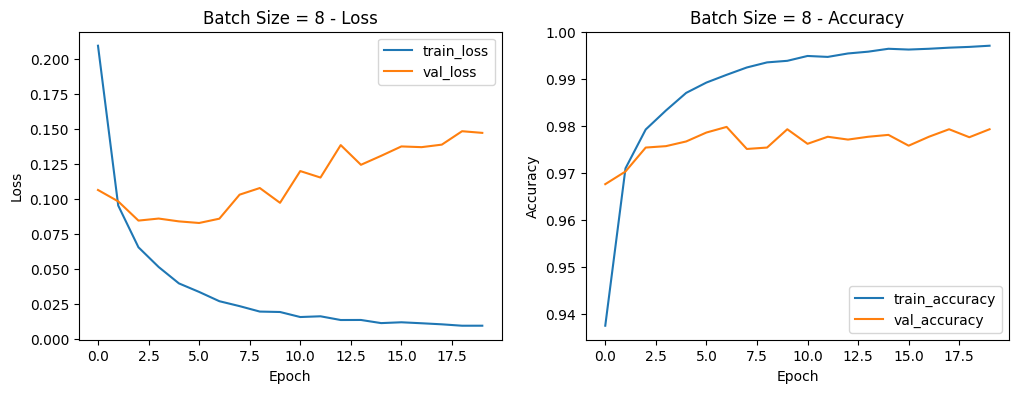

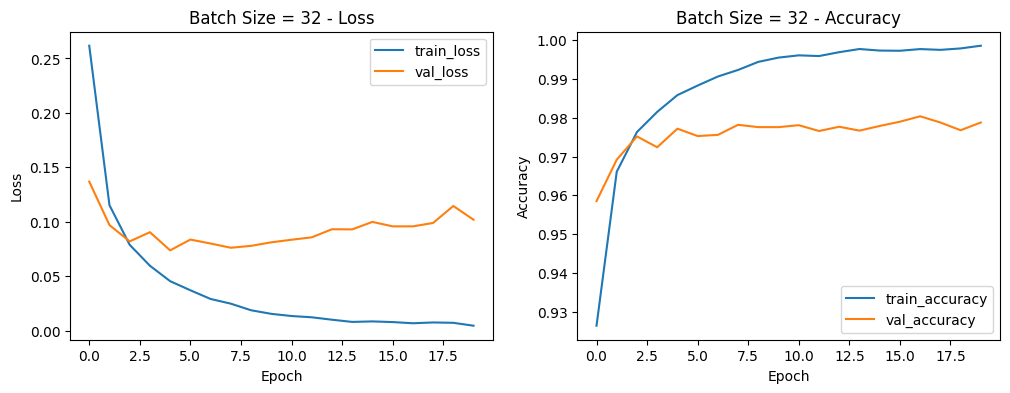

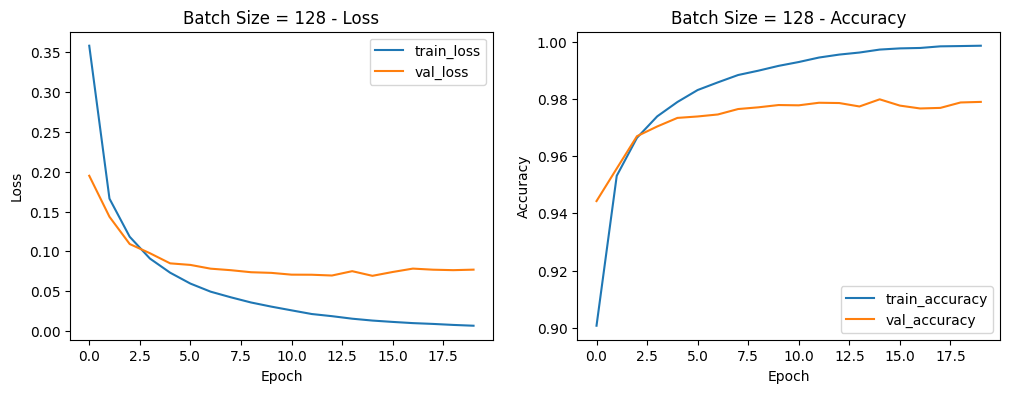

In [60]:
plot_history(history_bs_8, "Batch Size = 8")
plot_history(history_bs_32, "Batch Size = 32")
plot_history(history_bs_128, "Batch Size = 128")


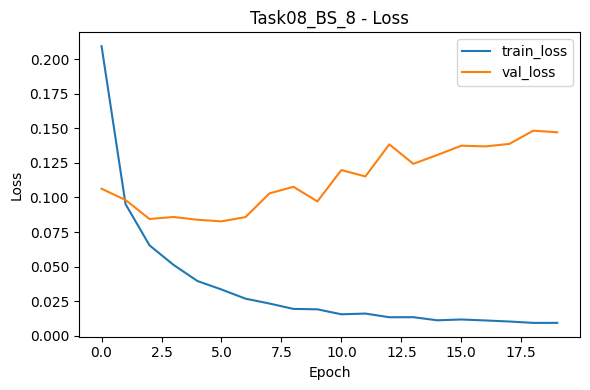

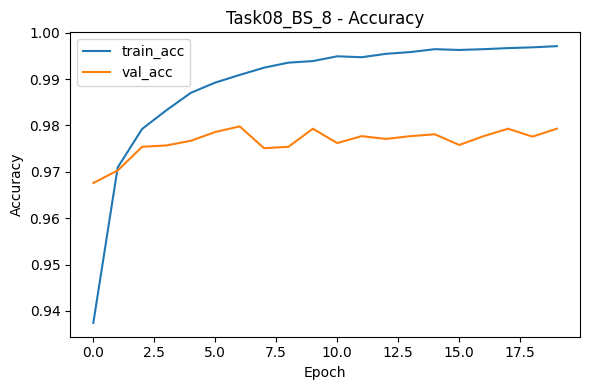

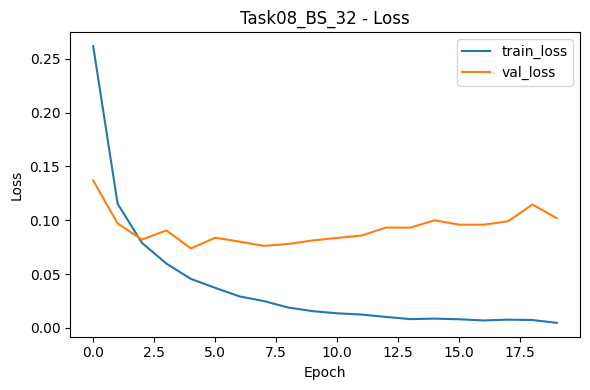

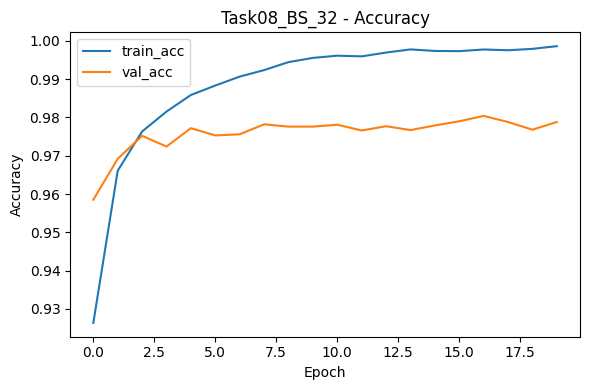

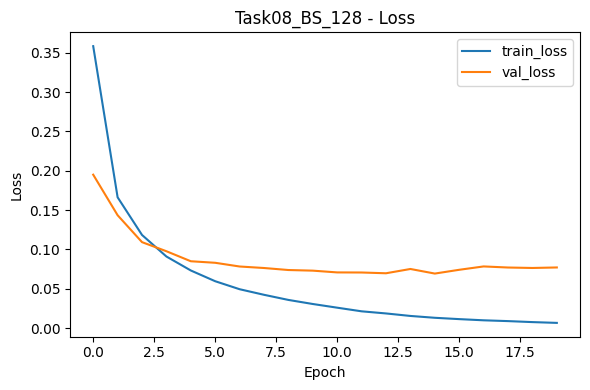

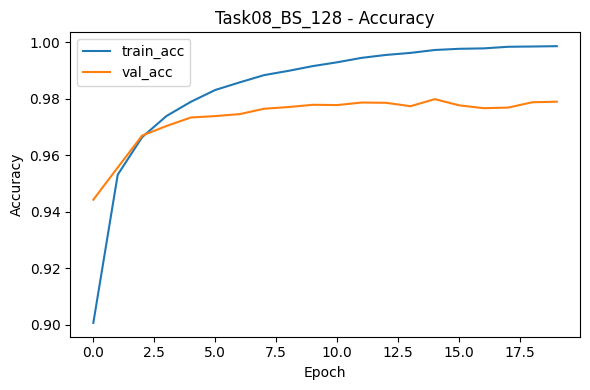

In [77]:
plot_history_and_save(history_bs_8,   "Task08_BS_8",   "results/loss_curves")
plot_history_and_save(history_bs_32,  "Task08_BS_32",  "results/loss_curves")
plot_history_and_save(history_bs_128, "Task08_BS_128", "results/loss_curves")


### Analysis

Small batch sizes add noise to gradients.
This noise can help the model escape bad minima.
Large batch sizes give smoother loss curves.
However, very large batches may generalize worse.


## Task 09 — Activation Function Variants


In [61]:
def train_with_activation(act):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation=act),
        keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    history = model.fit(
        x_train, y_train,
        epochs=20,
        validation_data=(x_test, y_test),
        verbose=1
    )
    return history


In [62]:
history_relu = train_with_activation("relu")
history_tanh = train_with_activation("tanh")
history_softsign = train_with_activation("softsign")


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8753 - loss: 0.4398 - val_accuracy: 0.9596 - val_loss: 0.1406
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9621 - loss: 0.1307 - val_accuracy: 0.9667 - val_loss: 0.1115
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9745 - loss: 0.0849 - val_accuracy: 0.9670 - val_loss: 0.1035
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9804 - loss: 0.0652 - val_accuracy: 0.9770 - val_loss: 0.0795
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9855 - loss: 0.0466 - val_accuracy: 0.9767 - val_loss: 0.0718
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9899 - loss: 0.0347 - val_accuracy: 0.9766 - val_loss: 0.0764
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9922 - loss: 0.0270 - val_accuracy: 0.9724 - val_loss: 0.0938
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9928 - loss: 0.0238 -

In [63]:
def build_gelu_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation=tf.nn.gelu),
        keras.layers.Dense(10, activation="softmax")
    ])
    return model

model_gelu = build_gelu_model()
model_gelu.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_gelu = model_gelu.fit(
    x_train, y_train,
    epochs=20,
    validation_data=(x_test, y_test),
    verbose=1
)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8803 - loss: 0.4249 - val_accuracy: 0.9610 - val_loss: 0.1286
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9661 - loss: 0.1166 - val_accuracy: 0.9711 - val_loss: 0.0910
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9787 - loss: 0.0716 - val_accuracy: 0.9743 - val_loss: 0.0829
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9852 - loss: 0.0509 - val_accuracy: 0.9738 - val_loss: 0.0818
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9882 - loss: 0.0382 - val_accuracy: 0.9777 - val_loss: 0.0753
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9914 - loss: 0.0275 - val_accuracy: 0.9758 - val_loss: 0.0761
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9932 - loss: 0.0236 - val_accuracy: 0.9797 - val_loss: 0.0678
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9950 - loss: 0.

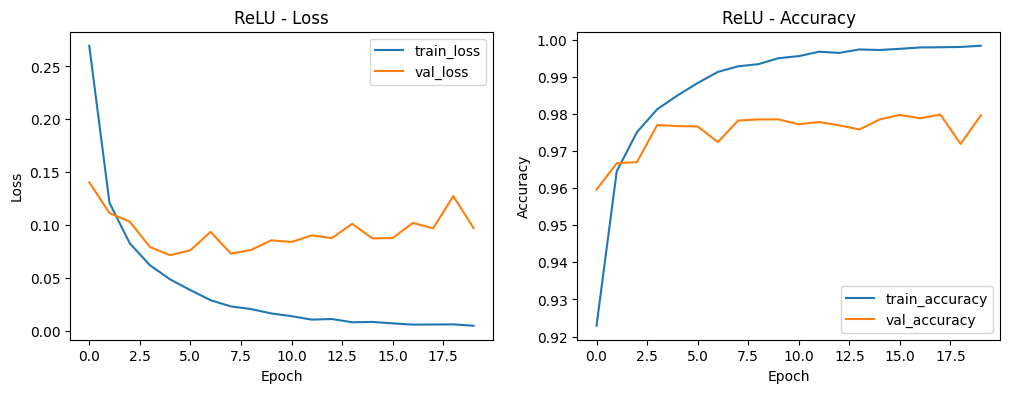

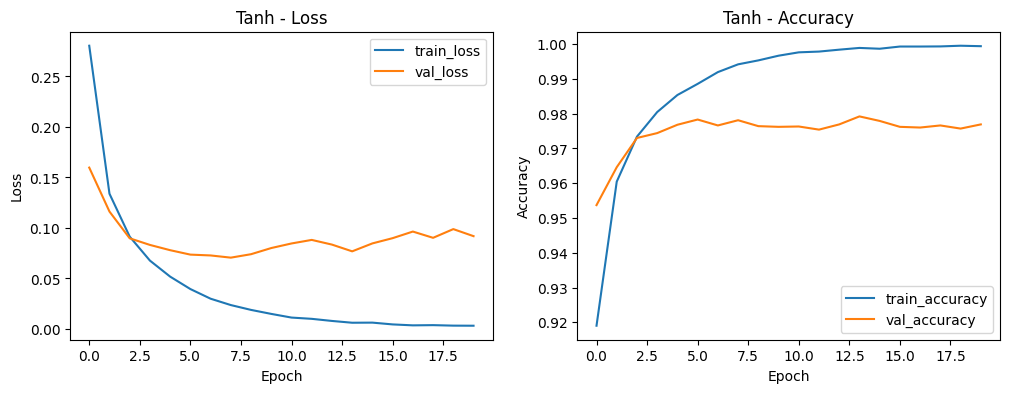

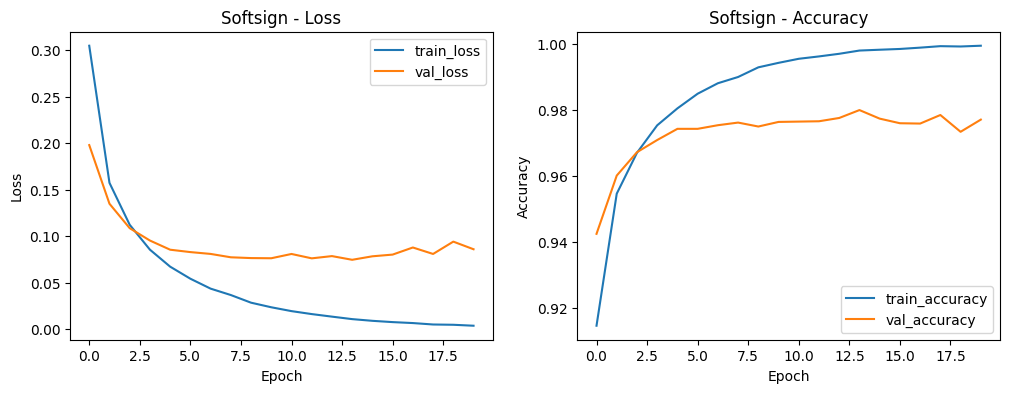

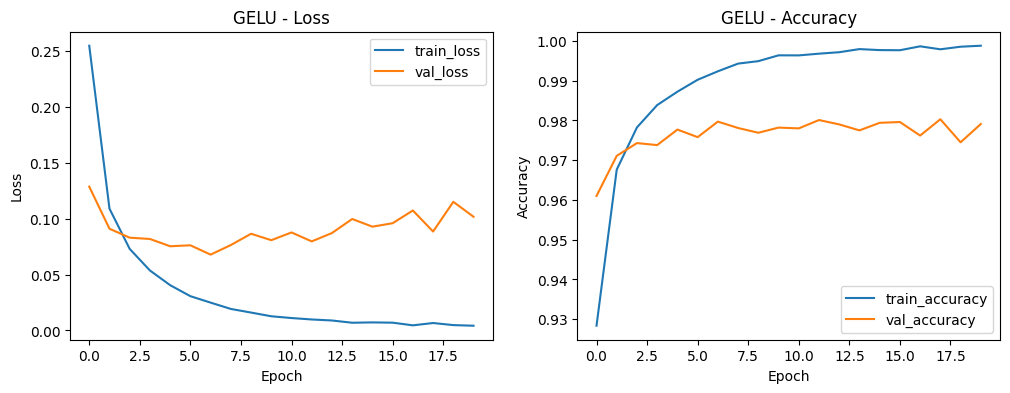

In [64]:
plot_history(history_relu, "ReLU")
plot_history(history_tanh, "Tanh")
plot_history(history_softsign, "Softsign")
plot_history(history_gelu, "GELU")


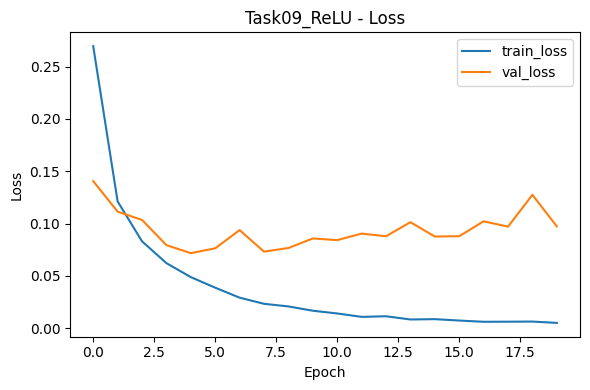

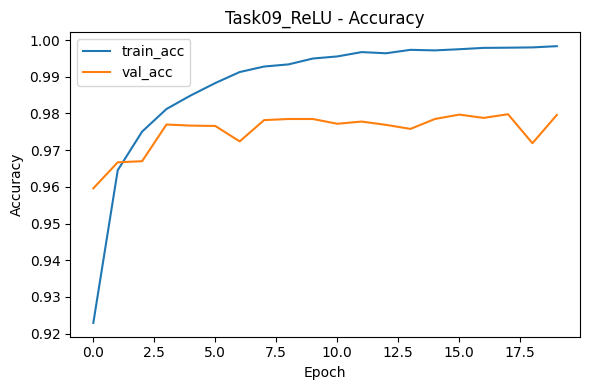

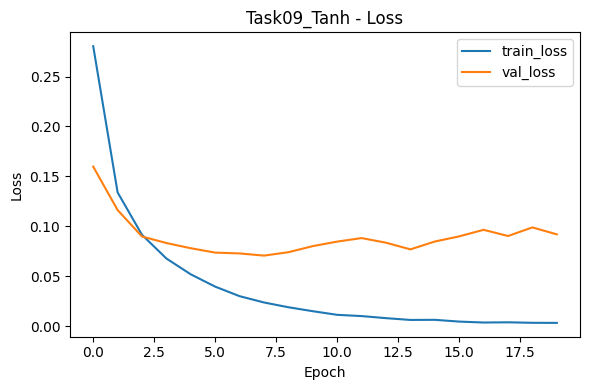

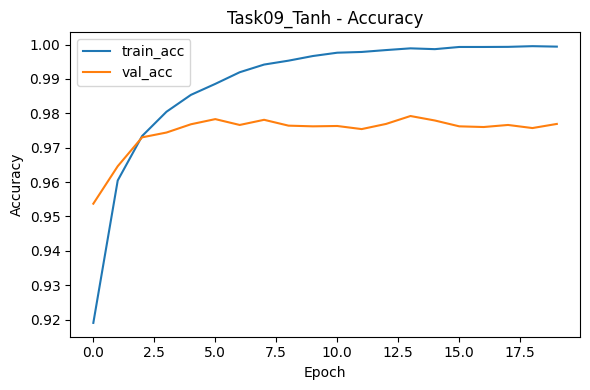

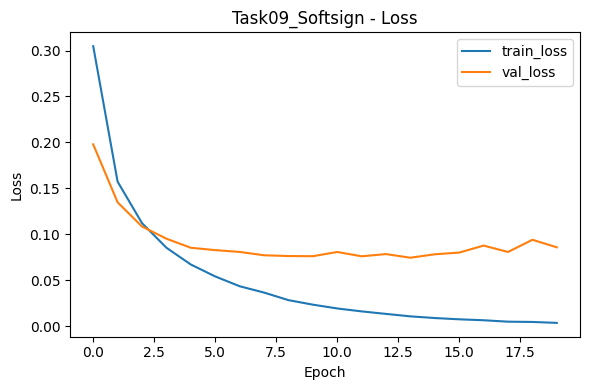

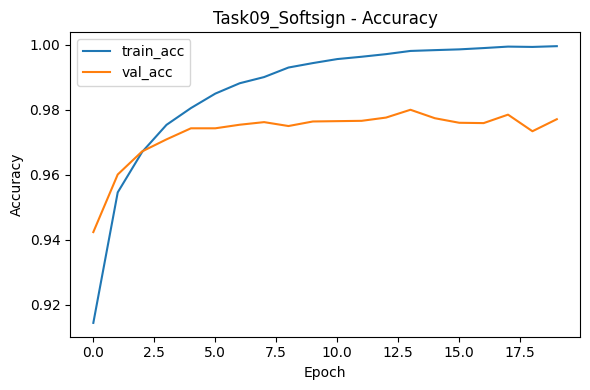

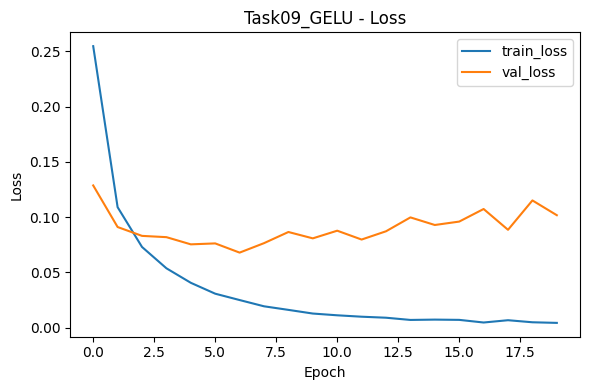

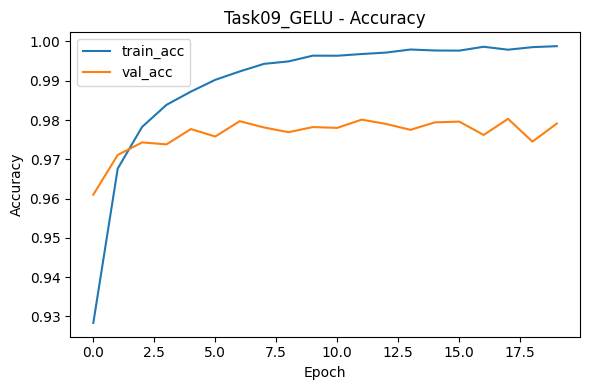

In [78]:
plot_history_and_save(history_relu,     "Task09_ReLU",     "results/loss_curves")
plot_history_and_save(history_tanh,     "Task09_Tanh",     "results/loss_curves")
plot_history_and_save(history_softsign, "Task09_Softsign", "results/loss_curves")
plot_history_and_save(history_gelu,     "Task09_GELU",     "results/loss_curves")


### Analysis

ReLU allows fast learning and avoids vanishing gradients.
Tanh and Softsign may suffer from vanishing gradients.
GELU performs smoothly and works well in deep models.
ReLU is simple and works well for many tasks.


## Task 10 — Weight Inspection & Model Capacity Analysis


In [65]:
w, b = model.layers[1].get_weights()
print("Weights shape:", w.shape)
print("Bias shape:", b.shape)

num_params = w.shape[0] * w.shape[1] + b.shape[0]
print("Number of parameters:", num_params)


Weights shape: (784, 128)
Bias shape: (128,)
Number of parameters: 100480


### Analysis

The Dense layer has a large number of parameters.
More parameters increase model capacity.
High capacity can cause overfitting.
Regularization methods help control this.


In [66]:
import os
os.makedirs("results/predictions", exist_ok=True)
os.makedirs("results/loss_curves", exist_ok=True)
os.makedirs("results/optimizer_tests", exist_ok=True)
print("results folders ready ")


results folders ready ✅


In [82]:
!zip -r results.zip results


updating: results/ (stored 0%)
updating: results/loss_curves/ (stored 0%)
updating: results/loss_curves/Task03_20Epochs_loss.png (deflated 12%)
updating: results/loss_curves/Task03_10Epochs_acc.png (deflated 12%)
updating: results/loss_curves/Task03_10Epochs_loss.png (deflated 12%)
updating: results/loss_curves/Task03_5Epochs_loss.png (deflated 13%)
updating: results/loss_curves/Task03_5Epochs_acc.png (deflated 14%)
updating: results/loss_curves/Task03_20Epochs_acc.png (deflated 12%)
updating: results/optimizer_tests/ (stored 0%)
updating: results/predictions/ (stored 0%)
  adding: results/loss_curves/Task09_Tanh_loss.png (deflated 12%)
  adding: results/loss_curves/Task09_Tanh_acc.png (deflated 12%)
  adding: results/loss_curves/Task05_Dropout_0.3_loss.png (deflated 12%)
  adding: results/loss_curves/Task08_BS_32_loss.png (deflated 11%)
  adding: results/loss_curves/Task05_Dropout_0.1_loss.png (deflated 12%)
  adding: results/loss_curves/Task09_GELU_loss.png (deflated 11%)
  adding: r